In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'datalab.sqlite')
db_path

'/Users/paulcolas/code/RonanB400/decp_ml/data/datalab.sqlite'

In [3]:
conn = sqlite3.connect(db_path)
db = conn.cursor()
query = f"""
SELECT *
FROM "data.gouv.fr.2022.clean"
"""

data = pd.read_sql_query(query, conn)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299670 entries, 0 to 299669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        299670 non-null  object 
 1   id                         299670 non-null  object 
 2   nature                     299670 non-null  object 
 3   acheteur_id                299670 non-null  object 
 4   acheteur_nom               299477 non-null  object 
 5   acheteur_siren             299500 non-null  object 
 6   titulaire_id               299670 non-null  object 
 7   titulaire_typeIdentifiant  299670 non-null  object 
 8   titulaire_nom              292097 non-null  object 
 9   titulaire_siren            298537 non-null  object 
 10  objet                      299670 non-null  object 
 11  montant                    299670 non-null  float64
 12  codeCPV                    299670 non-null  object 
 13  procedure                  29

In [4]:
# montants_df = data['montant'].dropna()
# montants_df.describe()

In [5]:
# fig, ax = plt.subplots(figsize=(5, 2.5))
# sns.histplot( montants_df,log_scale=True, ax=ax)
# ax.set_xscale('log')
# ax.set_xlim(10**3,10**9)
# ax.set_xlabel('Montant (€)')
# ax.set_ylabel('Nombre de commandes')
# ax.set_title('Distribution des montants des commandes')

In [6]:
df = pd.DataFrame(data)
df

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data
0,2154005160001320242024-LOT04,20242024-LOT04,Marché,21540051600013,COMMUNE DE BATILLY,215400516,78885470100018,SIRET,ACOMETAL,788854701,...,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,54980,Code postal,None,data.gouv.fr decp-2024.json
1,243500667002882021M226MO,2021M226MO,Marché,24350066700288,CC VAL D'ILLE-AUBIGNE,243500667,38373211200032,SIRET,UNIVERS,383732112,...,Prestations intellectuelles,1.0,Solidaire,NaN,NaN,NaN,35520,Code postal,None,data.gouv.fr decp-2024.json
2,249710047000472024SS_PRD_TRV,2024SS_PRD_TRV,Marché,24971004700047,COMMUNAUTE DE COMMUNES DE MARIE GALANTE,249710047,43387249600016,SIRET,COTRAM B.T.P.,433872496,...,Travaux,NaN,Solidaire,NaN,NaN,NaN,97112,Code postal,None,data.gouv.fr decp-2024.json
3,6254801990001124-0806-L2,24-0806-L2,Marché,62548019900011,"LA MAISON POUR TOUS, SOCIETE ANONYME COOPERATI...",625480199,55204695502544,SIRET,ENGIE ENERGIE SERVICES,552046955,...,Pas de CCAG,0.0,Pas de groupement,NaN,NaN,NaN,39,Code département,None,data.gouv.fr decp-2024.json
4,20002563300013202424011BCR,202424011BCR,Marché,20002563300013,SI DE RESTAURATION COLLECTIVE,200025633,47698032100238,SIRET,POMONA EPISAVEURS,476980321,...,Fournitures courantes et services,0.0,Pas de groupement,0.0,0.0,0.0,45800,Code postal,None,data.gouv.fr decp-2025-04.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299665,243000643000452024240072,2024240072,Marché,24300064300045,COMMUNAUTE AGGLO NIMES METROPOLE,243000643,79386502300055,SIRET,SERVICES MAINTENANCE ENERGIES,793865023,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,30947,Code postal,None,data.gouv.fr decp-2024.json
299666,2133016250001720230231110,20230231110,Marché,21330162500017,COMMUNE D'EYSINES,213301625,44010434700032,SIRET,L.T.B. AQUITAINE,440104347,...,Travaux,NaN,Pas de groupement,NaN,NaN,NaN,33320,Code postal,None,data.gouv.fr decp-2024.json
299667,25440109400068202323_006_02,202323_006_02,Marché,25440109400068,SYNDICAT MIXTE ATLANTIC'EAU,254401094,42856174000138,SIRET,CISE TP,428561740,...,Travaux,1.0,Conjoint,NaN,NaN,NaN,44100,Code postal,None,data.gouv.fr decp-2024.json
299668,219711132000152022I772-4,2022I772-4,Marché,21971113200015,COMMUNE DU GOSIER,219711132,41347003000029,SIRET,SOCIETE GUADELOUPEENNE DE TRAVAUX D'ENVIRONNEMENT,413470030,...,Travaux,NaN,Pas de groupement,0.0,0.0,0.0,97190,Code postal,None,data.gouv.fr decp-2025-01.json


In [7]:
data['formePrix'].value_counts()

formePrix
Forfaitaire    109095
Unitaire       107397
Mixte           83178
Name: count, dtype: int64

In [8]:
# data[data['codeCPV'] == '45000000-7'][['objet']]

In [9]:
data['formePrix'].value_counts()

formePrix
Forfaitaire    109095
Unitaire       107397
Mixte           83178
Name: count, dtype: int64

In [10]:
data['ccag'].value_counts()

ccag
Fournitures courantes et services                     92540
Travaux                                               92382
Pas de CCAG                                           84251
Prestations intellectuelles                           16225
Maitrise d'œuvre                                      10225
Techniques de l'information et de la communication     3930
Marchés industriels                                     117
Name: count, dtype: int64

In [11]:
# years = data['datePublicationDonnees'].str[:4]
# years.value_counts()

In [12]:
df.columns

Index(['uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
       'titulaire_id', 'titulaire_typeIdentifiant', 'titulaire_nom',
       'titulaire_siren', 'objet', 'montant', 'codeCPV', 'procedure',
       'dureeMois', 'dateNotification', 'datePublicationDonnees', 'formePrix',
       'attributionAvance', 'offresRecues', 'marcheInnovant', 'ccag',
       'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance',
       'origineUE', 'origineFrance', 'lieuExecution_code',
       'lieuExecution_typeCode', 'idAccordCadre', 'source_open_data'],
      dtype='object')

In [13]:
df[['montant', 'nature']].sort_values('montant', ascending=False)

,montant,nature
53469,1.000000e+14,Marché
25787,1.000000e+14,Marché
222172,1.000000e+14,Marché
49370,1.000000e+14,Marché
26745,1.000000e+14,Marché
...,...,...
93120,1.000000e-02,Marché
172400,1.000000e-02,Marché
83419,1.000000e-02,Marché
148400,1.000000e-02,Marché


In [14]:
df.sort_values('montant')

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data
172400,216802983000172024FORET001,2024FORET001,Marché,21680298300017,COMMUNE DE SAINTE MARIE AUX MINES,216802983,85036740000015,SIRET,IDOUX - FOR'EST,850367400,...,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,68160,Code postal,None,data.gouv.fr decp-2024.json
93120,21130001700012202524249,202524249,Marché,21130001700012,COMMUNE D AIX EN PROVENCE,211300017,94232457500011,SIRET,AIX-EN-PROVENCE QUALITE ENERGETIQUE,942324575,...,Pas de CCAG,0.0,Pas de groupement,0.0,0.0,0.0,13001,Code commune,None,data.gouv.fr decp-2025-05.json
219002,217805753000192021-PA-05,2021-PA-05,Marché,21780575300019,COMMUNE DE SAINT REMY LES CHEVREUSE,217805753,38261334700022,SIRET,YVELINES RESTAURATION,382613347,...,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,78470,Code postal,None,data.gouv.fr decp-2024.json
83419,219502770000152024S04,2024S04,Marché,21950277000015,COMMUNE DE GONESSE,219502770,47918275000667,SIRET,PEOPLE AND BABY,479182750,...,Fournitures courantes et services,0.0,Pas de groupement,NaN,0.0,0.0,95503,Code postal,None,data.gouv.fr decp-2024.json
36105,217805753000192023-CSP-033,2023-CSP-033,Marché,21780575300019,COMMUNE DE SAINT REMY LES CHEVREUSE,217805753,33950831900037,SIRET,AVANTAGES SERVICES SARL,339508319,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,78470,Code postal,None,data.gouv.fr decp-2024.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245157,200066058000132024PALF021L03,2024PALF021L03,Marché,20006605800013,CA SAINT LOUIS AGGLOMERATION,200066058,55208131766522,SIRET,ELECTRICITE DE FRANCE,552081317,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,68,Code département,None,data.gouv.fr decp-2024.json
174600,255801185000182024AC27,2024AC27,Marché,25580118500018,SYNDICAT INTERCOMMUNAL D ENERGIES D EQUIPEMENT...,255801185,54210765113030,SIRET,ENGIE,542107651,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,058,Code département,None,data.gouv.fr decp-2024.json
43566,200066058000132024PALF021L02,2024PALF021L02,Marché,20006605800013,CA SAINT LOUIS AGGLOMERATION,200066058,91437880700020,SIRET,LBE BUSINESS,914378807,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,68,Code département,None,data.gouv.fr decp-2024.json
74519,200066058000132024PALF021L03,2024PALF021L03,Marché,20006605800013,CA SAINT LOUIS AGGLOMERATION,200066058,54210765113030,SIRET,ENGIE,542107651,...,Fournitures courantes et services,NaN,Pas de groupement,NaN,NaN,NaN,68,Code département,None,data.gouv.fr decp-2024.json


In [15]:
df.columns

Index(['uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
       'titulaire_id', 'titulaire_typeIdentifiant', 'titulaire_nom',
       'titulaire_siren', 'objet', 'montant', 'codeCPV', 'procedure',
       'dureeMois', 'dateNotification', 'datePublicationDonnees', 'formePrix',
       'attributionAvance', 'offresRecues', 'marcheInnovant', 'ccag',
       'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance',
       'origineUE', 'origineFrance', 'lieuExecution_code',
       'lieuExecution_typeCode', 'idAccordCadre', 'source_open_data'],
      dtype='object')

In [16]:
df['origineFrance'].value_counts()

origineFrance
0.0000    166426
1.0000      1441
0.5000       612
0.0100        97
0.1000        54
           ...  
0.3200         1
0.7100         1
0.2100         1
0.1818         1
0.2700         1
Name: count, Length: 103, dtype: int64

In [17]:
df['origineUE'].value_counts()

origineUE
0.00    166489
1.00      1510
0.50       588
0.01        92
0.20        38
         ...  
0.49         1
0.62         1
0.64         1
0.74         1
0.52         1
Name: count, Length: 95, dtype: int64

In [18]:
df['attributionAvance'].value_counts()

attributionAvance
0.0    107423
1.0     18368
Name: count, dtype: int64

In [52]:
len(df[df['tauxAvance'] != 0])

148171

In [50]:
df['tauxAvance'].isnull().sum()

129557

In [48]:
148171 + 129557

277728

In [49]:
len(df)

299670

In [20]:
df['marcheInnovant'].isna().sum()

176350

<Axes: xlabel='dureeMois', ylabel='Count'>

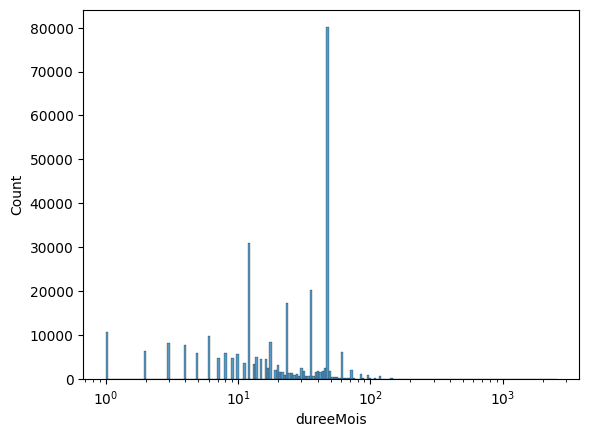

In [21]:
sns.histplot(df['dureeMois'], log_scale=True)

In [22]:
df['sousTraitanceDeclaree'].value_counts()

sousTraitanceDeclaree
0.0    112338
1.0     42773
Name: count, dtype: int64

In [23]:
df['sousTraitanceDeclaree'].isna().sum()

144559

In [24]:
df.isna().sum().sort_values(ascending=False)

idAccordCadre                234106
marcheInnovant               176350
attributionAvance            173879
sousTraitanceDeclaree        144559
origineUE                    130481
origineFrance                130480
tauxAvance                   129557
offresRecues                 101443
titulaire_nom                  7573
titulaire_siren                1133
acheteur_nom                    193
acheteur_siren                  170
dureeMois                         7
datePublicationDonnees            2
lieuExecution_code                0
typeGroupementOperateurs          0
ccag                              0
lieuExecution_typeCode            0
uid                               0
dateNotification                  0
formePrix                         0
id                                0
procedure                         0
codeCPV                           0
montant                           0
objet                             0
titulaire_typeIdentifiant         0
titulaire_id                

In [25]:
df['formePrix']

0         Forfaitaire
1         Forfaitaire
2         Forfaitaire
3         Forfaitaire
4            Unitaire
             ...     
299665          Mixte
299666    Forfaitaire
299667       Unitaire
299668          Mixte
299669    Forfaitaire
Name: formePrix, Length: 299670, dtype: object

In [26]:
df['montant'].median()

158355.3

In [29]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [30]:
df.describe()

,montant,dureeMois,attributionAvance,offresRecues,marcheInnovant,sousTraitanceDeclaree,tauxAvance,origineUE,origineFrance
count,299670,299663,125791,198227,123320,155111,170113,169189,169190
mean,10400531089,28,0,5,0,0,0,0,0
std,1017208205225,25,0,37,0,0,0,0,0
min,0,1,0,1,0,0,0,0,0
25%,70000,12,0,2,0,0,0,0,0
50%,158355,24,0,3,0,0,0,0,0
75%,469065,48,0,5,0,1,0,0,0
max,99999999999999,2555,1,13454,1,1,1,1,1


In [31]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', ' '))

In [32]:
df.describe()

,montant,dureeMois,attributionAvance,offresRecues,marcheInnovant,sousTraitanceDeclaree,tauxAvance,origineUE,origineFrance
count,299 670,299 663,125 791,198 227,123 320,155 111,170 113,169 189,169 190
mean,10 400 531 089,28,0,5,0,0,0,0,0
std,1 017 208 205 225,25,0,37,0,0,0,0,0
min,0,1,0,1,0,0,0,0,0
25%,70 000,12,0,2,0,0,0,0,0
50%,158 355,24,0,3,0,0,0,0,0
75%,469 065,48,0,5,0,1,0,0,0
max,99 999 999 999 999,2 555,1,13 454,1,1,1,1,1


In [37]:
df[[df['attributionAvance'] != 1 and df['tauxAvance'] > 0]].sum()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
tauxA

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().